# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import torch

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

IMAGE_PATH = 'img_align_celeba/'
image_size = 64
# SAMPLE_PATH = '../'

# if not os.path.exists(SAMPLE_PATH):
#     os.makedirs(SAMPLE_PATH)
    
    
transform = transforms.Compose([
    #transforms.Scale(image_size),
    transforms.Resize(image_size),
    transforms.CenterCrop((image_size,image_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
data_loader = ImageFolder(IMAGE_PATH, transform)


#data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=8, drop_last=True)
valid_loader, train_loader, test_loader = get_celeba_dataloader(data_loader, 
                                                                batch_size=128)
test_batch = iter(test_loader)
test_batch = next(test_batch)
new_labels =torch.tensor(test_batch[1])
print(torch.tensor(test_batch[0]).shape)
#latent_dist = model.encode(torch.tensor(test_batch[0]).cuda())




162079 20259 20261
torch.Size([128, 3, 64, 64])


/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


### Define latent distribution of the model

In [2]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.VAEmodel_f import VAE
from jointvae.training_l import Trainer
from torch import optim
from viz.visualize_l import Visualizer
import matplotlib.pyplot as plt
import numpy as np



#valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 20
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
#model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=5e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 0
lambda_od = 10*lambda_d
lambda_dis = 30*lambda_d 
path="FaceFig/VAE/cont_{}/".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=20, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=20, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=30, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [3]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'modelDIPf_params.pkl')
torch.save(model, './modelDIPf')
##15.078 - 0.0147  17.209 - 0.0168 error tanh 
##LR 1e-3 0.019-0.023 worse should pick 5e-4
##PLOT THE CURVE!!!!!
#16-2033.294813156128 32-2846.2241864204407

0/162079	Loss: 1436.190
6400/162079	Loss: 1295.048
12800/162079	Loss: 965.078
19200/162079	Loss: 681.910
25600/162079	Loss: 531.158
32000/162079	Loss: 479.965
38400/162079	Loss: 450.431
44800/162079	Loss: 433.073
51200/162079	Loss: 404.643
57600/162079	Loss: 393.684
64000/162079	Loss: 379.356
70400/162079	Loss: 373.519
76800/162079	Loss: 367.833
83200/162079	Loss: 358.695
89600/162079	Loss: 353.792
96000/162079	Loss: 350.408
102400/162079	Loss: 345.067
108800/162079	Loss: 338.174
115200/162079	Loss: 338.010
121600/162079	Loss: 337.275
128000/162079	Loss: 331.708
134400/162079	Loss: 330.714
140800/162079	Loss: 327.462
147200/162079	Loss: 325.503
153600/162079	Loss: 323.787
160000/162079	Loss: 319.597
Valid Loss: 320.433, Recon Error: 0.071
320.43332696110946
Epoch: 1 Average loss: 444.93 Valid loss: 320.43332696110946	Recon Error:0.071
0/162079	Loss: 320.880
6400/162079	Loss: 320.277
12800/162079	Loss: 320.029
19200/162079	Loss: 320.435
25600/162079	Loss: 319.000
32000/162079	Loss: 315.

147200/162079	Loss: 266.998
153600/162079	Loss: 269.144
160000/162079	Loss: 269.409
Valid Loss: 268.777, Recon Error: 0.054
268.77749057985704
Epoch: 10 Average loss: 269.22 Valid loss: 268.77749057985704	Recon Error:0.054
0/162079	Loss: 263.505
6400/162079	Loss: 270.070
12800/162079	Loss: 268.934
19200/162079	Loss: 269.164
25600/162079	Loss: 265.518
32000/162079	Loss: 270.030
38400/162079	Loss: 267.673
44800/162079	Loss: 268.270
51200/162079	Loss: 267.893
57600/162079	Loss: 266.601
64000/162079	Loss: 268.455
70400/162079	Loss: 269.144
76800/162079	Loss: 267.870
83200/162079	Loss: 267.499
89600/162079	Loss: 269.187
96000/162079	Loss: 268.673
102400/162079	Loss: 268.206
108800/162079	Loss: 264.731
115200/162079	Loss: 266.920
121600/162079	Loss: 269.681
128000/162079	Loss: 266.918
134400/162079	Loss: 266.834
140800/162079	Loss: 267.132
147200/162079	Loss: 269.002
153600/162079	Loss: 269.608
160000/162079	Loss: 266.455
Valid Loss: 268.635, Recon Error: 0.053
268.6350429702855
Epoch: 11 Av

89600/162079	Loss: 260.747
96000/162079	Loss: 260.568
102400/162079	Loss: 260.029
108800/162079	Loss: 263.229
115200/162079	Loss: 261.543
121600/162079	Loss: 259.495
128000/162079	Loss: 260.285
134400/162079	Loss: 262.824
140800/162079	Loss: 264.661
147200/162079	Loss: 260.813
153600/162079	Loss: 262.186
160000/162079	Loss: 260.479
Valid Loss: 262.976, Recon Error: 0.055
262.97609705894996
Epoch: 21 Average loss: 261.45 Valid loss: 262.97609705894996	Recon Error:0.055
0/162079	Loss: 253.756
6400/162079	Loss: 259.770
12800/162079	Loss: 261.836
19200/162079	Loss: 260.799
25600/162079	Loss: 260.537
32000/162079	Loss: 260.764
38400/162079	Loss: 260.330
44800/162079	Loss: 261.611
51200/162079	Loss: 260.772
57600/162079	Loss: 261.609
64000/162079	Loss: 260.257
70400/162079	Loss: 261.460
76800/162079	Loss: 258.651
83200/162079	Loss: 259.658
89600/162079	Loss: 260.420
96000/162079	Loss: 262.980
102400/162079	Loss: 258.747
108800/162079	Loss: 259.882
115200/162079	Loss: 262.404
121600/162079	Lo

32000/162079	Loss: 258.025
38400/162079	Loss: 260.279
44800/162079	Loss: 255.393
51200/162079	Loss: 257.749
57600/162079	Loss: 256.712
64000/162079	Loss: 259.048
70400/162079	Loss: 258.402
76800/162079	Loss: 256.304
83200/162079	Loss: 257.188
89600/162079	Loss: 257.736
96000/162079	Loss: 257.991
102400/162079	Loss: 259.301
108800/162079	Loss: 258.282
115200/162079	Loss: 256.898
121600/162079	Loss: 256.641
128000/162079	Loss: 255.653
134400/162079	Loss: 257.842
140800/162079	Loss: 256.997
147200/162079	Loss: 258.138
153600/162079	Loss: 258.792
160000/162079	Loss: 256.571
Valid Loss: 260.026, Recon Error: 0.050
260.0264445370848
Epoch: 31 Average loss: 257.93 Valid loss: 260.0264445370848	Recon Error:0.050
0/162079	Loss: 272.344
6400/162079	Loss: 256.456
12800/162079	Loss: 258.136
19200/162079	Loss: 257.100
25600/162079	Loss: 256.998
32000/162079	Loss: 258.841
38400/162079	Loss: 255.358
44800/162079	Loss: 255.252
51200/162079	Loss: 256.590
57600/162079	Loss: 255.072
64000/162079	Loss: 25

0/162079	Loss: 246.726
6400/162079	Loss: 254.967
12800/162079	Loss: 256.393
19200/162079	Loss: 255.455
25600/162079	Loss: 253.728
32000/162079	Loss: 255.725
38400/162079	Loss: 256.601
44800/162079	Loss: 254.004
51200/162079	Loss: 254.650
57600/162079	Loss: 254.833
64000/162079	Loss: 254.081
70400/162079	Loss: 256.957
76800/162079	Loss: 252.883
83200/162079	Loss: 255.731
89600/162079	Loss: 257.412
96000/162079	Loss: 256.104
102400/162079	Loss: 256.327
108800/162079	Loss: 257.716
115200/162079	Loss: 255.549
121600/162079	Loss: 256.310
128000/162079	Loss: 254.799
134400/162079	Loss: 256.168
140800/162079	Loss: 256.871
147200/162079	Loss: 257.669
153600/162079	Loss: 255.773
160000/162079	Loss: 255.962
Valid Loss: 258.853, Recon Error: 0.055
258.8526993277688
Epoch: 41 Average loss: 255.82 Valid loss: 258.8526993277688	Recon Error:0.055
0/162079	Loss: 252.727
6400/162079	Loss: 255.905
12800/162079	Loss: 255.139
19200/162079	Loss: 254.462
25600/162079	Loss: 257.326
32000/162079	Loss: 253.903

140800/162079	Loss: 256.284
147200/162079	Loss: 252.711
153600/162079	Loss: 253.908
160000/162079	Loss: 254.031
Valid Loss: 258.152, Recon Error: 0.049
258.1520054655255
Epoch: 50 Average loss: 254.48 Valid loss: 258.1520054655255	Recon Error:0.049
0/162079	Loss: 240.981
6400/162079	Loss: 253.589
12800/162079	Loss: 253.838
19200/162079	Loss: 254.136
25600/162079	Loss: 249.807
32000/162079	Loss: 253.268
38400/162079	Loss: 254.649
44800/162079	Loss: 257.046
51200/162079	Loss: 252.666
57600/162079	Loss: 253.176
64000/162079	Loss: 254.625
70400/162079	Loss: 254.011
76800/162079	Loss: 254.533
83200/162079	Loss: 254.037
89600/162079	Loss: 257.902
96000/162079	Loss: 256.463
102400/162079	Loss: 256.578
108800/162079	Loss: 254.571
115200/162079	Loss: 251.565
121600/162079	Loss: 252.634
128000/162079	Loss: 254.725
134400/162079	Loss: 253.673
140800/162079	Loss: 252.366
147200/162079	Loss: 254.136
153600/162079	Loss: 256.275
160000/162079	Loss: 254.920
Valid Loss: 257.776, Recon Error: 0.054
257.

83200/162079	Loss: 251.802
89600/162079	Loss: 251.929
96000/162079	Loss: 254.076
102400/162079	Loss: 256.655
108800/162079	Loss: 252.532
115200/162079	Loss: 252.873
121600/162079	Loss: 251.865
128000/162079	Loss: 252.932
134400/162079	Loss: 252.563
140800/162079	Loss: 253.299
147200/162079	Loss: 252.189
153600/162079	Loss: 252.322
160000/162079	Loss: 254.729
Valid Loss: 257.095, Recon Error: 0.062
257.0953080279272
Epoch: 60 Average loss: 253.31 Valid loss: 257.0953080279272	Recon Error:0.062
0/162079	Loss: 244.776
6400/162079	Loss: 253.677
12800/162079	Loss: 252.816
19200/162079	Loss: 251.799
25600/162079	Loss: 252.101
32000/162079	Loss: 253.163
38400/162079	Loss: 250.668
44800/162079	Loss: 253.499
51200/162079	Loss: 251.868
57600/162079	Loss: 253.258
64000/162079	Loss: 252.240
70400/162079	Loss: 252.213
76800/162079	Loss: 253.919
83200/162079	Loss: 253.182
89600/162079	Loss: 253.039
96000/162079	Loss: 254.319
102400/162079	Loss: 252.829
108800/162079	Loss: 253.734
115200/162079	Loss:

25600/162079	Loss: 252.754
32000/162079	Loss: 251.623
38400/162079	Loss: 251.287
44800/162079	Loss: 250.729
51200/162079	Loss: 251.199
57600/162079	Loss: 253.640
64000/162079	Loss: 252.923
70400/162079	Loss: 252.626
76800/162079	Loss: 252.367
83200/162079	Loss: 251.201
89600/162079	Loss: 250.614
96000/162079	Loss: 253.790
102400/162079	Loss: 254.299
108800/162079	Loss: 250.864
115200/162079	Loss: 250.042
121600/162079	Loss: 253.273
128000/162079	Loss: 251.056
134400/162079	Loss: 255.705
140800/162079	Loss: 254.509
147200/162079	Loss: 252.559
153600/162079	Loss: 252.857
160000/162079	Loss: 252.692
Valid Loss: 256.214, Recon Error: 0.047
256.21422456945265
Epoch: 70 Average loss: 252.39 Valid loss: 256.21422456945265	Recon Error:0.047
0/162079	Loss: 239.571
6400/162079	Loss: 251.413
12800/162079	Loss: 251.991
19200/162079	Loss: 253.110
25600/162079	Loss: 252.276
32000/162079	Loss: 252.167
38400/162079	Loss: 250.490
44800/162079	Loss: 252.941
51200/162079	Loss: 251.226
57600/162079	Loss: 

Valid Loss: 256.467, Recon Error: 0.054
256.4668430352361
Epoch: 79 Average loss: 251.71 Valid loss: 256.4668430352361	Recon Error:0.054
0/162079	Loss: 256.170
6400/162079	Loss: 251.189
12800/162079	Loss: 251.436
19200/162079	Loss: 251.388
25600/162079	Loss: 252.661
32000/162079	Loss: 252.761
38400/162079	Loss: 251.307
44800/162079	Loss: 250.989
51200/162079	Loss: 251.527
57600/162079	Loss: 251.711
64000/162079	Loss: 252.791
70400/162079	Loss: 252.442
76800/162079	Loss: 254.676
83200/162079	Loss: 251.345
89600/162079	Loss: 251.184
96000/162079	Loss: 250.025
102400/162079	Loss: 252.882
108800/162079	Loss: 248.962
115200/162079	Loss: 253.369
121600/162079	Loss: 251.554
128000/162079	Loss: 251.710
134400/162079	Loss: 249.670
140800/162079	Loss: 253.297
147200/162079	Loss: 249.137
153600/162079	Loss: 248.751
160000/162079	Loss: 250.786
Valid Loss: 256.645, Recon Error: 0.056
256.64480312515354
Epoch: 80 Average loss: 251.68 Valid loss: 256.64480312515354	Recon Error:0.056
0/162079	Loss: 24

108800/162079	Loss: 250.901
115200/162079	Loss: 251.110
121600/162079	Loss: 250.079
128000/162079	Loss: 251.642
134400/162079	Loss: 250.333
140800/162079	Loss: 248.773
147200/162079	Loss: 253.065
153600/162079	Loss: 252.299
160000/162079	Loss: 252.580
Valid Loss: 255.721, Recon Error: 0.052
255.720842757315
Epoch: 89 Average loss: 251.09 Valid loss: 255.720842757315	Recon Error:0.052
0/162079	Loss: 241.375
6400/162079	Loss: 249.183
12800/162079	Loss: 252.147
19200/162079	Loss: 252.312
25600/162079	Loss: 247.781
32000/162079	Loss: 252.683
38400/162079	Loss: 250.841
44800/162079	Loss: 251.364
51200/162079	Loss: 250.949
57600/162079	Loss: 250.433
64000/162079	Loss: 250.166
70400/162079	Loss: 250.949
76800/162079	Loss: 251.998
83200/162079	Loss: 251.143
89600/162079	Loss: 250.122
96000/162079	Loss: 252.689
102400/162079	Loss: 251.555
108800/162079	Loss: 247.605
115200/162079	Loss: 250.852
121600/162079	Loss: 251.010
128000/162079	Loss: 251.964
134400/162079	Loss: 249.891
140800/162079	Loss

51200/162079	Loss: 251.842
57600/162079	Loss: 249.145
64000/162079	Loss: 250.569
70400/162079	Loss: 248.092
76800/162079	Loss: 249.360
83200/162079	Loss: 251.058
89600/162079	Loss: 248.594
96000/162079	Loss: 249.569
102400/162079	Loss: 251.087
108800/162079	Loss: 251.083
115200/162079	Loss: 249.395
121600/162079	Loss: 250.479
128000/162079	Loss: 251.767
134400/162079	Loss: 250.712
140800/162079	Loss: 251.660
147200/162079	Loss: 251.354
153600/162079	Loss: 253.729
160000/162079	Loss: 252.771
Valid Loss: 256.286, Recon Error: 0.050
256.2857268711306
Epoch: 99 Average loss: 250.58 Valid loss: 256.2857268711306	Recon Error:0.050
0/162079	Loss: 257.652
6400/162079	Loss: 249.717
12800/162079	Loss: 248.880
19200/162079	Loss: 249.877
25600/162079	Loss: 249.942
32000/162079	Loss: 253.139
38400/162079	Loss: 251.167
44800/162079	Loss: 248.692
51200/162079	Loss: 250.785
57600/162079	Loss: 250.353
64000/162079	Loss: 250.532
70400/162079	Loss: 250.684
76800/162079	Loss: 250.948
83200/162079	Loss: 25

In [4]:
model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model.load_state_dict(torch.load('modelDIPf_params.pkl'))
#path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(len(loss["DIP_loss"]))
if not os.path.exists(path):
    os.makedirs(path)
print(lr)

28520
0.0005


# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

(8, 8)
0.9895283


/data/home/ISO/Pruned_VAE/viz/visualize_l.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)


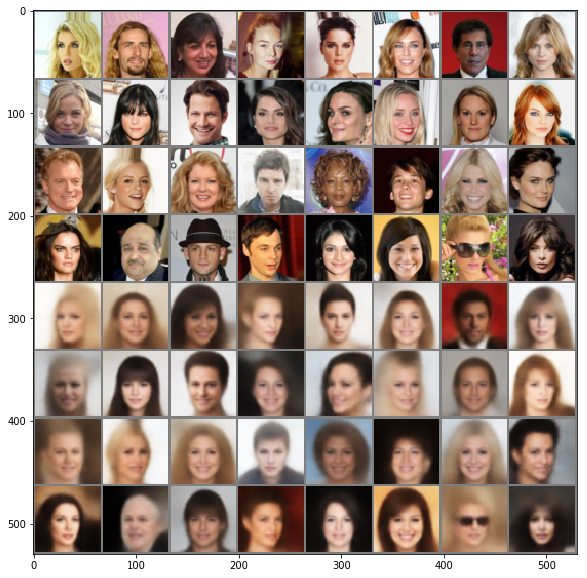

In [5]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
recon=np.rollaxis(recon.numpy(), 0, 3)  
print(recon[265:,:,:].max())
recon[:,:,:]=(recon[:,:,:]+1)/2
plt.imshow(recon[:,:,:].astype(float))

#MNIST
# plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
# print(recon.numpy()[0, :, :].max())
plt.savefig(path+"/recon.png")



In [6]:
def TCR():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont']
        cov = covmatrix(mean)
        cov[torch.abs(cov)<=1e-6]=0
        cor = cov2cor(cov)
        totalc += np.sum(cor) 

    return totalc/len(test_loader)

def TCV():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont']
        cov = covmatrix(mean).cpu().detach().numpy()
        cov = cov-np.diag(np.diag(cov))
        #print(np.sum(cov**2) )
        totalc += np.sum(cov**2) 
        
    return totalc/len(test_loader)


def covmatrix(mean):
    exp_mu = torch.mean(mean, dim=0)  #####mean through batch

    # expectation of mu mu.tranpose
    mu_expand1 = mean.unsqueeze(1)  #####(batch_size, 1, number of mean of latent variables)
    mu_expand2 = mean.unsqueeze(2)  #####(batch_size, number of mean of latent variables, 1) ignore batch_size, only transpose the means
    exp_mu_mu_t = torch.mean(mu_expand1 * mu_expand2, dim=0)

    # covariance of model mean
    cov = exp_mu_mu_t - exp_mu.unsqueeze(0) * exp_mu.unsqueeze(1) 
    return cov
def cov2cor(c):
    #input batch * n_cont
    c = c.cpu().detach()
    d=np.zeros_like(c)
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            d[i,j]=c[i,j]/(np.sqrt(c[i,i]*c[j,j]+1e-10))
    return d
tcor=TCR()
tcov=TCV()
print(tcor,tcov)
trainer.evaluate(test_loader)
#16  12.551628477254491 2.2266025315596838e-05 Valid Loss: 220.690, Recon Error: 0.185
#32  32.79880483590873 0.26285673431150475 Valid Loss: 68.768, Recon Error: 0.0145

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


19.404145390732484 3.396429216336904
Valid Loss: 256.636, Recon Error: 0.051


(256.63558768026485, tensor(0.0512, device='cuda:0', grad_fn=<DivBackward0>))

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


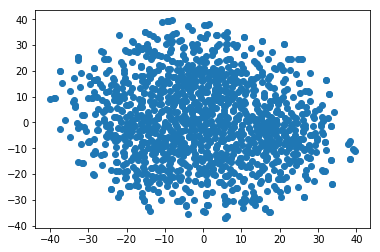

In [7]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

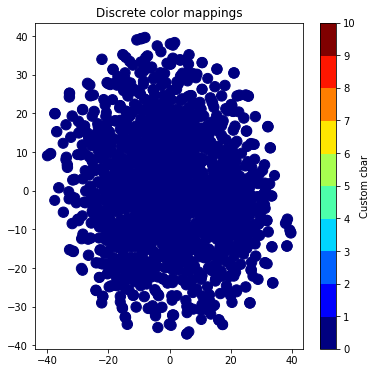

In [8]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')

plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

0.9981548


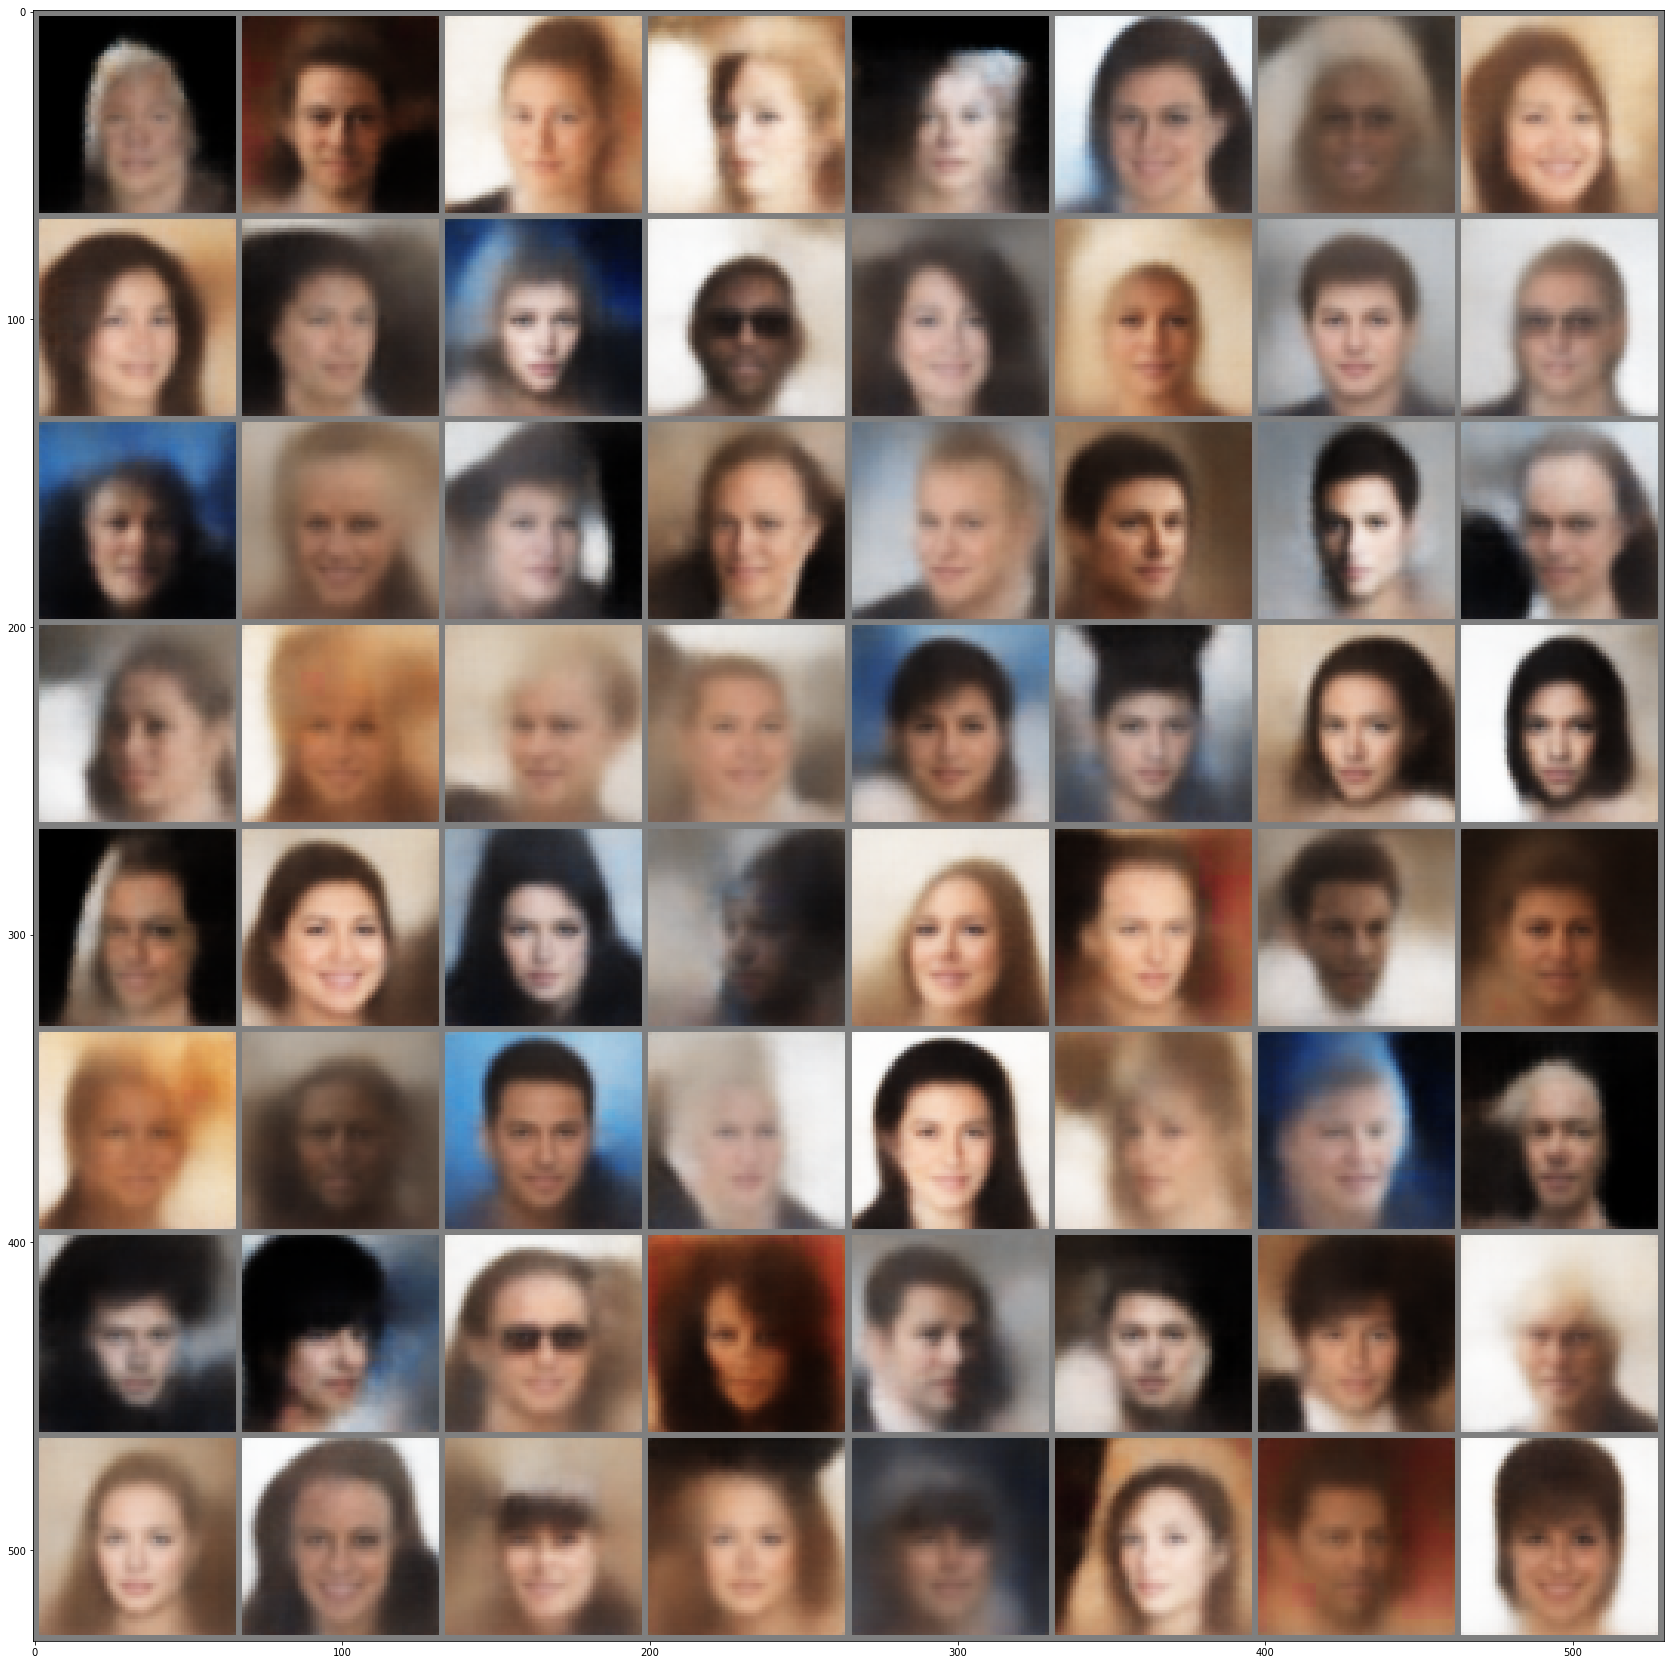

In [9]:
# Plot samples
import matplotlib as mpl

#MNIST
# samples = viz.samples()
# sample=samples.numpy()[0, :, :]/2+0.5
# plt.imshow(sample, cmap='gray')
# plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')


# face
fig = plt.figure(figsize=(30, 30)) 
samples = viz.samples()
samples = np.rollaxis(samples.numpy(), 0, 3)  
print(samples[:,:,0].max())
samples=(samples+1)/2
plt.imshow(samples.astype(float),norm = norm)
plt.imsave(path+"/samples",samples)
###DIP

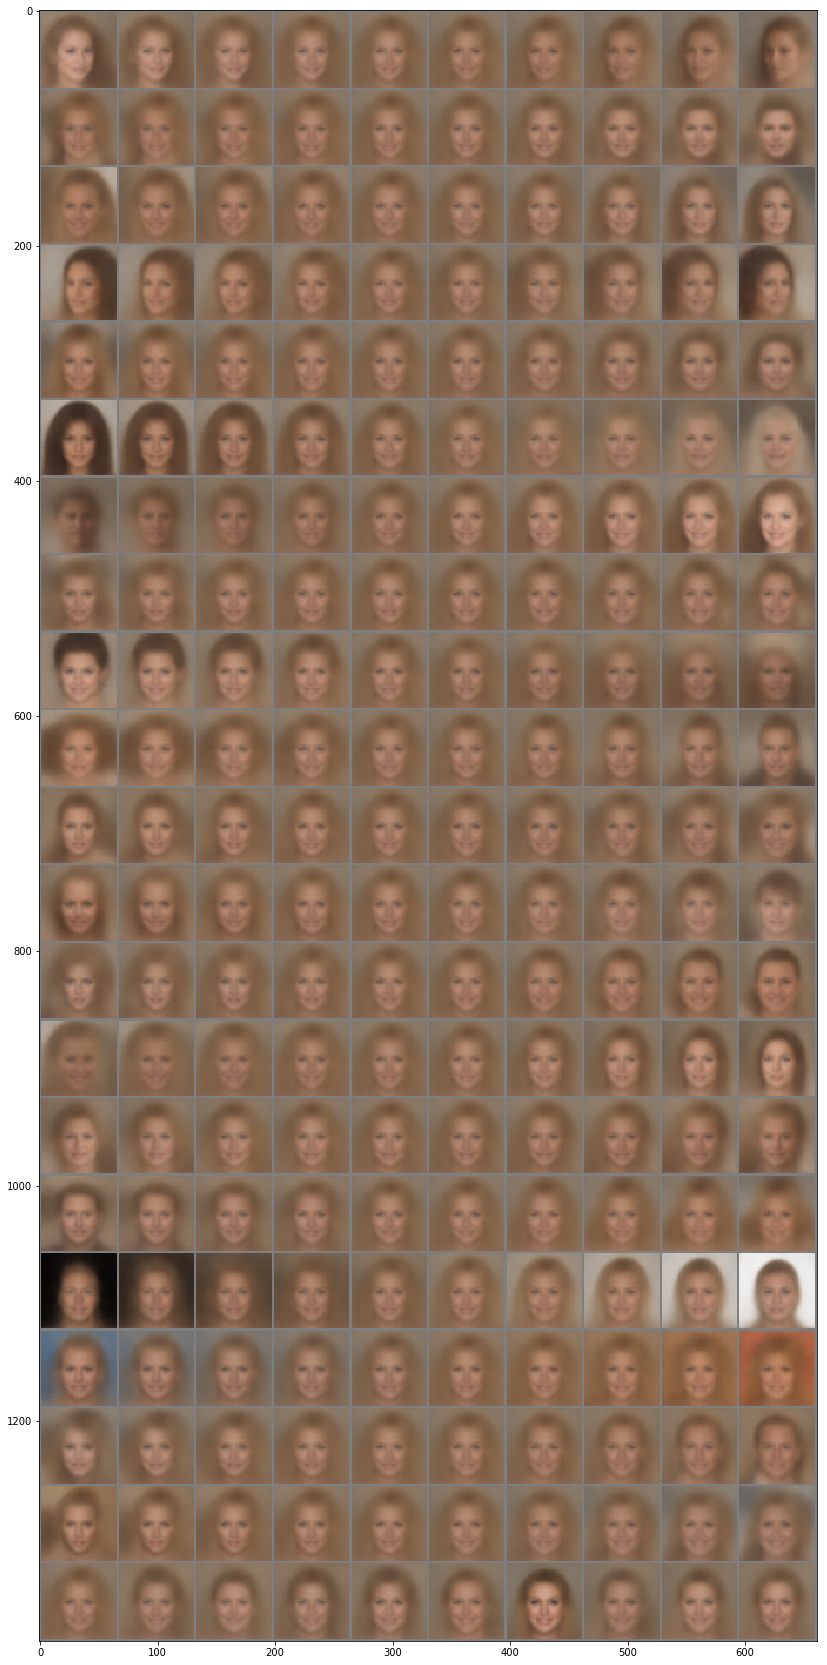

In [10]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)  
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

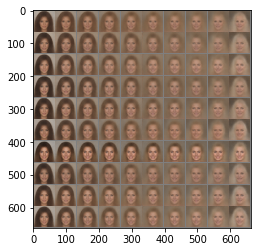

In [11]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=5, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

# traversals.numpy()[0, :, :].max()
#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

continuous


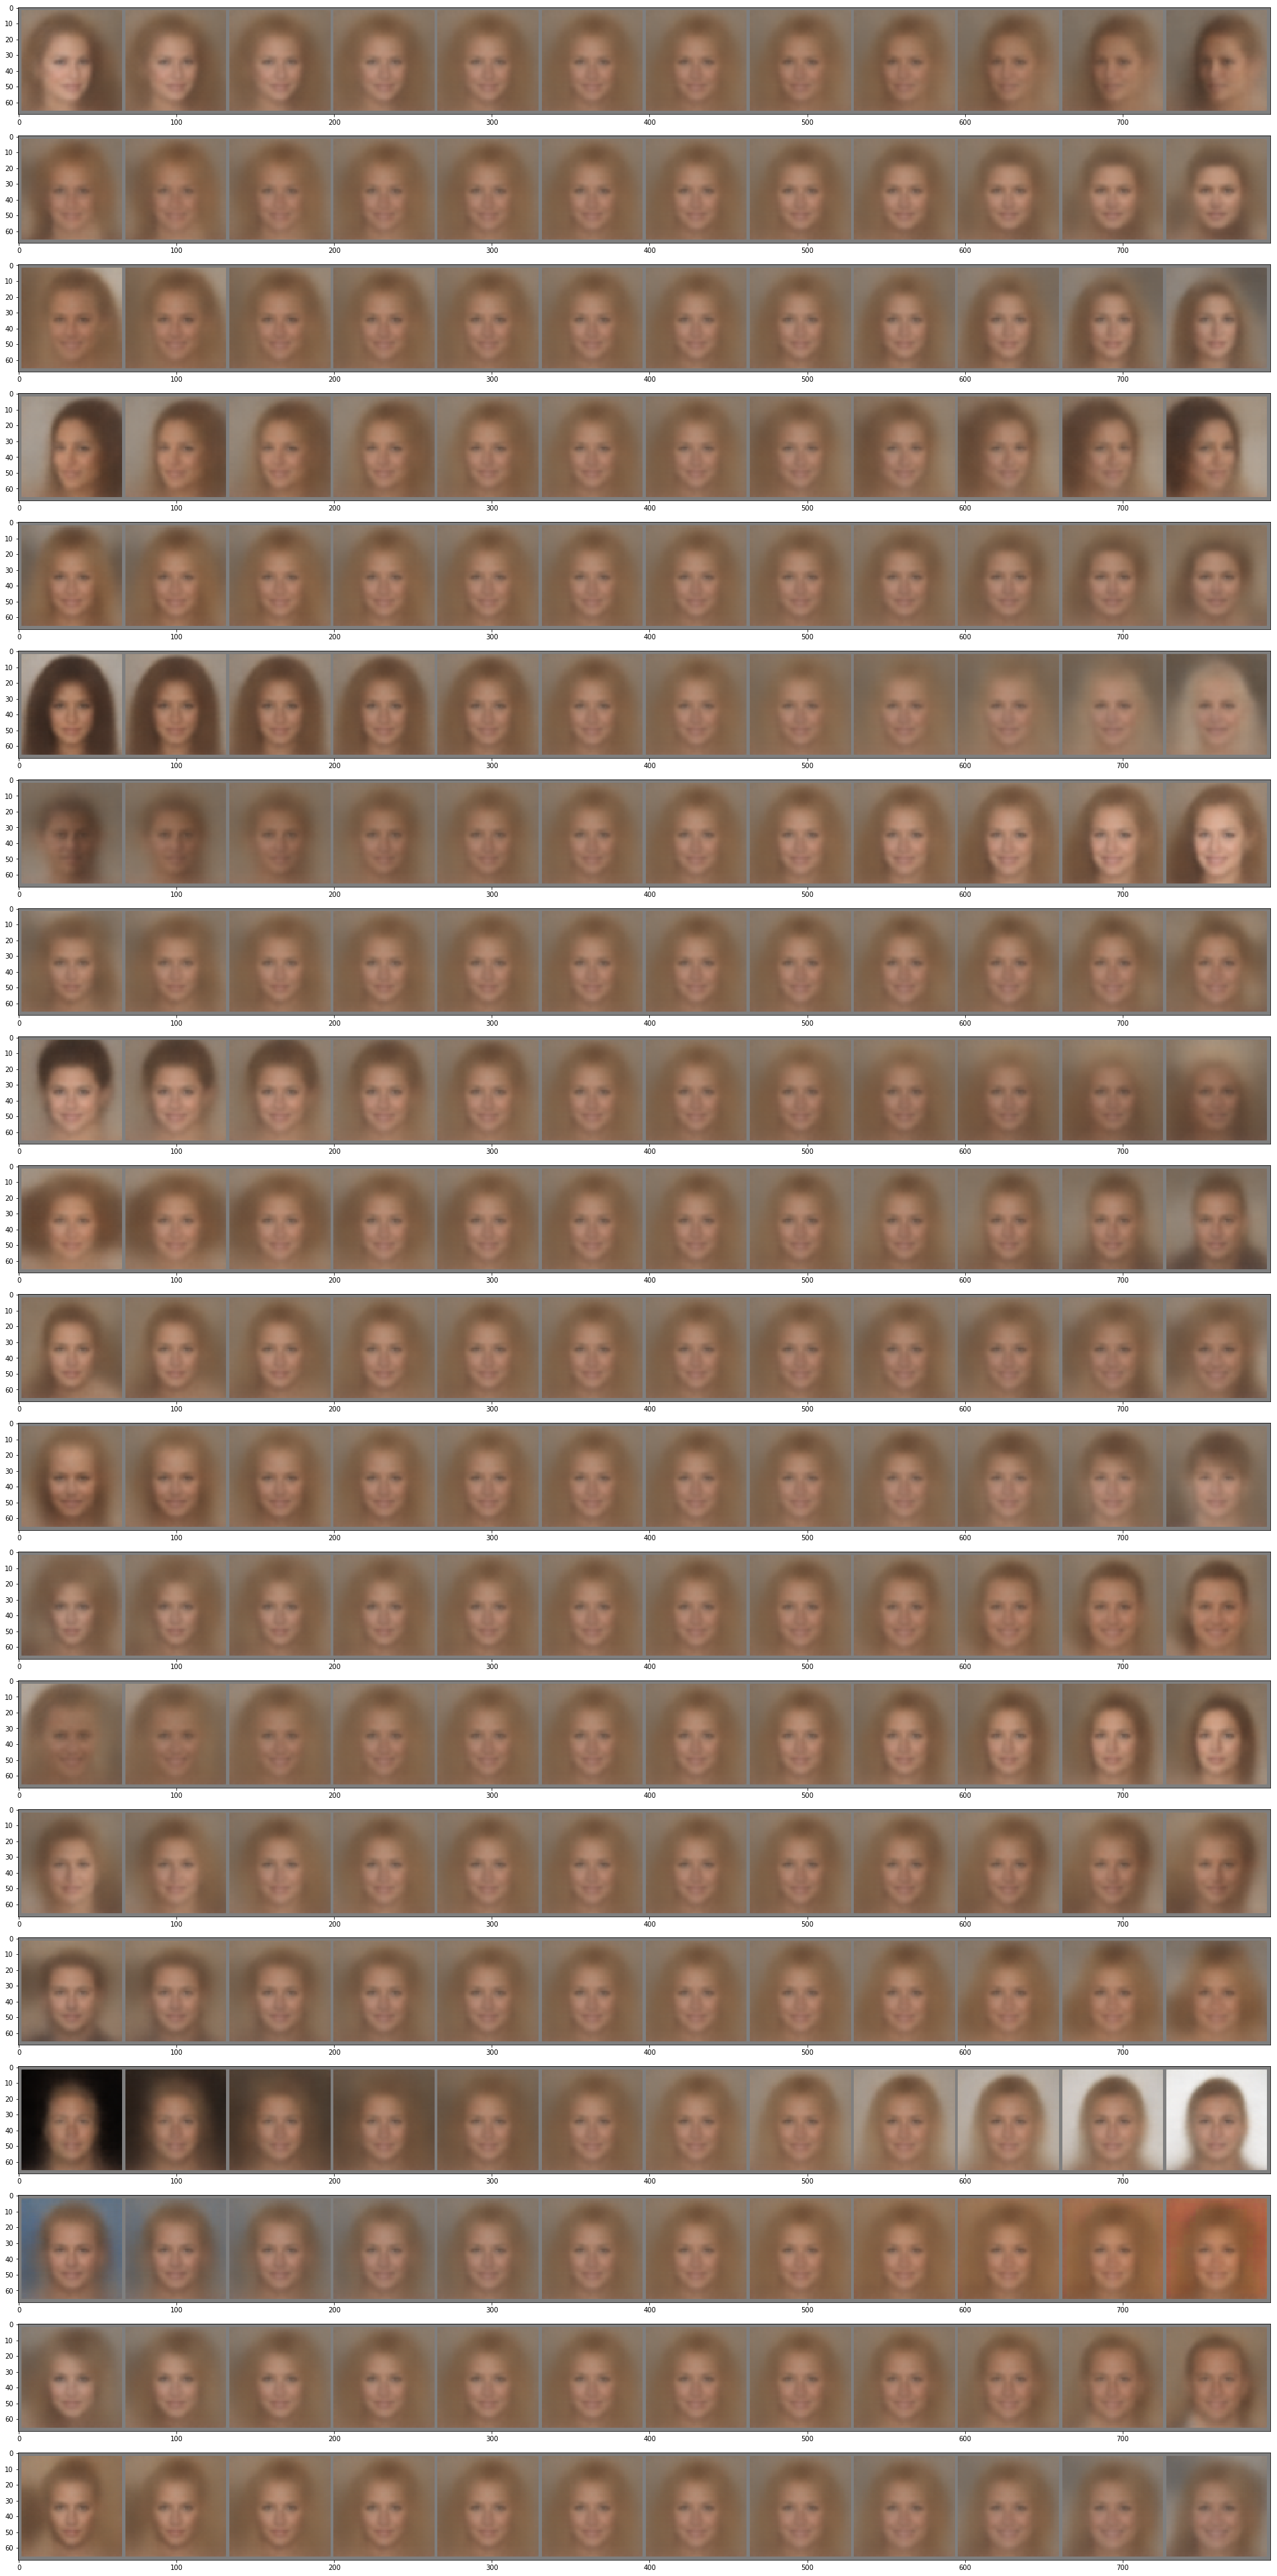

In [12]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     plt.savefig(path+"/cont{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_cont, 1, i + 1)
    traversals=(traversals+1)/2
    plt.imshow(traversals)   
plt.savefig(path+"/cont.png")
   

discrete


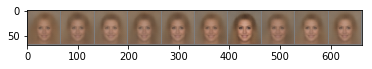

In [13]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
#     sub = fig.add_subplot(n_disc, 1, i + 1)
#     plt.savefig(path+"/disc{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_disc, 1, i + 1)
traversals=(traversals+1)/2
plt.savefig(path+"/disc{}.png".format(i))
plt.imshow(traversals)

In [14]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
        generated = (generated +1)/2
        print(generated.min(),generated.max())
        plt.imshow(generated)

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
            result = model.decode(latent_samples).cpu()
        return result

#MNIST
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#         # Generate latent traversal
# #         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
# #                                                              disc_idx=disc_idx,
# #                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         plt.imshow(generated.detach().numpy(),cmap="gray")

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#         return model.decode(latent_samples).cpu()

In [15]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)

interactive(children=(IntSlider(value=10, description='cont_idx', max=20), FloatSlider(value=0.0, description=…